# Global sea level budget
Check how the components add up

In [54]:
import sys
sys.path.append('../code')
import importlib

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cftime

import SeaLevelContrib as slc


In [55]:
importlib.reload(slc)

<module 'SeaLevelContrib' from '../code/SeaLevelContrib.py'>

In [56]:
def deep_steric_PJ10(first_year, last_year):
    '''Deep ocean bellow 2000m contribution to global mean sea level in cm/year,
    from Purkey and Johnson 0.1mm/year'''
    
    deep_steric = (np.arange(first_year,last_year) - first_year)*0.01
    deep_steric_df = pd.DataFrame(data={'time':np.arange(first_year,last_year), 
                                        'deep_steric':deep_steric})
    deep_steric_df = deep_steric_df.set_index('time')
    return deep_steric_df

<AxesSubplot:xlabel='time'>

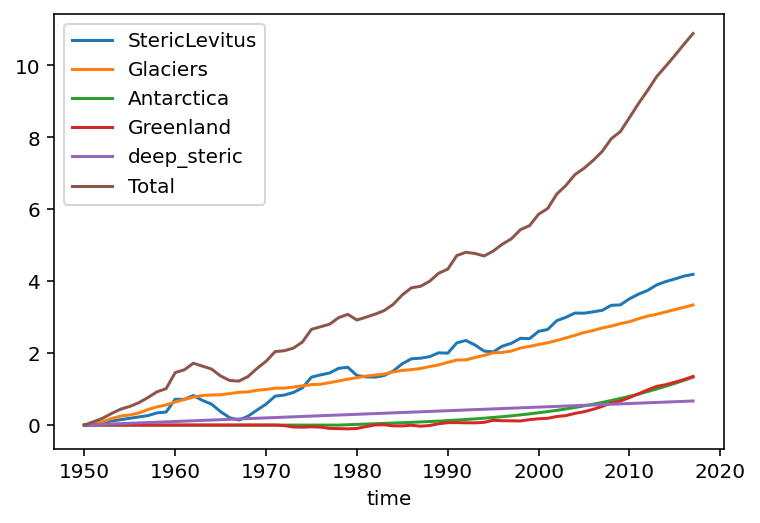

In [57]:
GloSLDang19_df = slc.GloSLDang19()

glac_df = slc.glaciers_m15(tg_id = None, extrap=True, del_green=True)
ant_df = slc.ant_rignot19()  #imbie or rignot19
#ant_df = slc.ant_imbie_glo(extrap=True) 
green_df = slc.green_mouginot19_glo()
tws_df = slc.tws_glo_humphrey19()

deep_steric_df = deep_steric_PJ10(1950, 2020)

sealevel_df = slc.LevitusSL(extrap_back = True)
# Extrapollate to 1950?
#sealevel_df = sealevel_df.join([glac_df, ant_df, green_df, tws_df], how='inner')
sealevel_df = sealevel_df.join([glac_df, ant_df, green_df, deep_steric_df], how='inner')
sealevel_df = sealevel_df - sealevel_df.loc[1950]

sealevel_df['Total'] = sealevel_df.sum(axis=1)
sealevel_df.index.names = ['time']

sealevel_df.plot()

In [58]:
sealevel_df

,StericLevitus,Glaciers,Antarctica,Greenland,deep_steric,Total
time,,,,,,
1950,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1951,0.037695,0.044387,0.000000,0.000000,0.01,0.092082
1952,0.075390,0.093377,0.000000,0.000000,0.02,0.188766
1953,0.113085,0.180265,0.000000,0.000000,0.03,0.323350
1954,0.150780,0.251949,0.000000,0.000000,0.04,0.442728
...,...,...,...,...,...,...
2013,3.899132,3.082162,1.004522,1.077000,0.63,9.692816
2014,3.990814,3.146930,1.080473,1.123139,0.64,9.981356
2015,4.064255,3.211698,1.160647,1.192972,0.65,10.279572


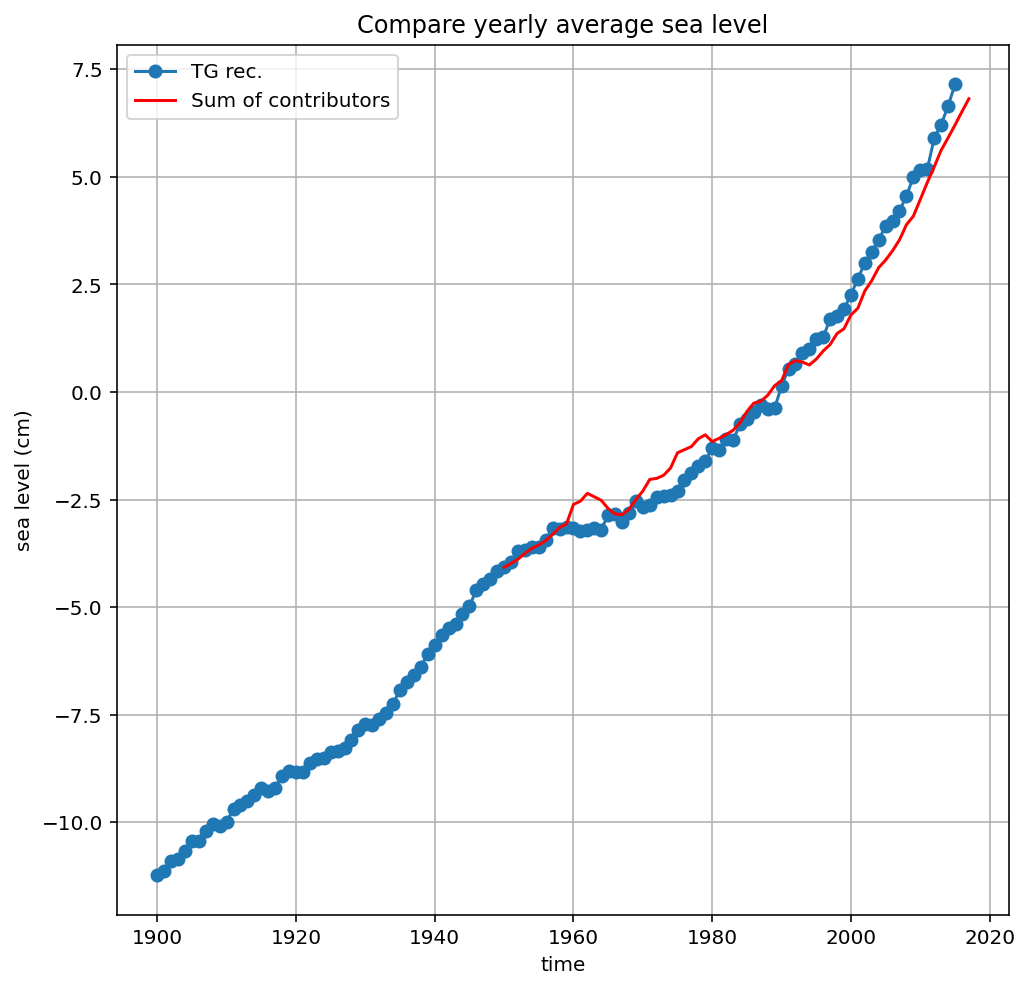

In [59]:
#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(GloSLDang19_df - GloSLDang19_df.loc[1953:2018].mean(), 'o-', label='TG rec.')
ax.plot(sealevel_df.Total - sealevel_df.Total.mean() , 'r-', label='Sum of contributors')

#ax.set_aspect(1)
#ax.set_xlim([ys,2020])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Compare yearly average sea level')
ax.grid(True)
plt.legend(loc='upper left')

The sum of contributors is not high enough compared to the reconstruction. Could missing glaciers and deep ocean fill the gap?
Deep ocean OHC increase is around 5% of the top 2000m (Zanna et al. 2019 consistent with Gebbie et al. 2019) . This is not enough to bridge the gap.

### Using Frederikse et al. 2020 data

In [60]:
fts = pd.read_excel('../data/Frederikse2020/global_basin_timeseries.xlsx', sheet_name='Global')
fts = fts.rename(columns = {fts.columns[0]:'time'})
fts = fts.set_index('time')
fts.index = fts.index +0.5
fts

,Observed GMSL [lower],Observed GMSL [mean],Observed GMSL [upper],Sum of contributors [lower],Sum of contributors [mean],Sum of contributors [upper],Steric [lower],Steric [mean],Steric [upper],Glaciers [lower],...,Reservoir impoundment [upper],Groundwater depletion [lower],Groundwater depletion [mean],Groundwater depletion [upper],Natural TWS [lower],Natural TWS [mean],Natural TWS [upper],Altimetry [lower],Altimetry [mean],Altimetry [upper]
time,,,,,,,,,,,,,,,,,,,,,
1900.5,-203.557267,-173.261442,-141.002807,-199.227905,-173.090775,-146.755371,-58.666306,-48.279350,-37.552917,-95.500000,...,34.349998,-16.549999,-12.482123,-8.20,-3.90,-2.063471,0.0,NaN,NaN,NaN
1901.5,-201.018509,-168.801675,-135.897609,-195.460754,-170.245468,-144.462433,-58.755146,-49.144897,-38.849602,-94.599998,...,34.349998,-16.500000,-12.455986,-8.20,-1.25,0.809499,3.0,NaN,NaN,NaN
1902.5,-212.074044,-180.389967,-148.213824,-193.369812,-168.421829,-142.791672,-59.155018,-49.877560,-39.888828,-93.500000,...,34.299999,-16.500000,-12.428749,-8.15,0.00,2.109289,4.4,NaN,NaN,NaN
1903.5,-202.697564,-170.267832,-138.930518,-193.189880,-168.557556,-143.225800,-60.985012,-51.100590,-40.815861,-92.849998,...,34.299999,-16.450001,-12.399526,-8.15,0.00,2.142349,4.6,NaN,NaN,NaN
1904.5,-200.167015,-168.720071,-137.450122,-193.112183,-168.372360,-142.754593,-62.585712,-52.240177,-41.379253,-91.800003,...,34.299999,-16.400000,-12.370537,-8.10,-0.30,1.730843,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014.5,3.502924,11.868936,20.258065,10.868380,12.164775,13.248381,4.308544,4.670032,5.028707,2.450000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.597370,12.316882,15.094145
2015.5,9.216259,17.869521,26.591747,18.938299,20.688692,22.158627,5.933526,6.744699,7.239516,3.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.347687,23.342237,26.391973
2016.5,15.510550,23.941862,32.672989,21.122080,23.292170,25.237761,5.686140,6.472463,7.420359,3.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.668184,25.728231,28.832306


In [62]:
# Read the AR5 sea level projections
SCE = 'rcp45' # 'rcp26', 'rcp45', 'rcp60', 'rcp85'
path_ar5_proj = '~/Projects/Project_ProbSLR/Data_Proj/Data_AR5/Final_Projections/'
ar5_proj = xr.open_dataset(f'{path_ar5_proj}{SCE}_sumlower.nc')
ar5_proj_df = pd.DataFrame({'time': 2006.5 + np.arange(len(ar5_proj.time))})

for contrib in ['sum', 'antdyn', 'antsmb', 'expansion', 'glacier', 'greendyn', 
                'greensmb', 'landwater']:
    for filen in [f'{SCE}_{contrib}lower', f'{SCE}_{contrib}mid', 
                  f'{SCE}_{contrib}upper']:
        ar5_proj = xr.open_dataset(f'{path_ar5_proj}{filen}.nc')
        ar5_proj_df[filen] = ar5_proj.global_average_sea_level_change

ar5_proj_df = ar5_proj_df.set_index('time')
ar5_proj_df = ar5_proj_df*100 # Convert from m to cm


In [63]:
ar5_proj_df

,rcp45_sumlower,rcp45_summid,rcp45_sumupper,rcp45_antdynlower,rcp45_antdynmid,rcp45_antdynupper,rcp45_antsmblower,rcp45_antsmbmid,rcp45_antsmbupper,rcp45_expansionlower,...,rcp45_glacierupper,rcp45_greendynlower,rcp45_greendynmid,rcp45_greendynupper,rcp45_greensmblower,rcp45_greensmbmid,rcp45_greensmbupper,rcp45_landwaterlower,rcp45_landwatermid,rcp45_landwaterupper
time,,,,,,,,,,,,,,,,,,,,,
2006.5,0.986662,1.725490,2.464319,0.010238,0.040525,0.070812,-0.021463,-0.010423,0.000617,0.823883,...,0.532622,0.016428,0.031259,0.046089,-0.001032,0.008419,0.017869,-0.024471,-0.014388,-0.004304
2007.5,1.207504,2.081027,2.954551,0.020722,0.082101,0.143479,-0.041034,-0.019650,0.001734,0.943130,...,0.823267,0.032634,0.063035,0.093435,-0.002338,0.015810,0.033958,-0.048603,-0.027551,-0.006498
2008.5,1.412243,2.451441,3.490639,0.031452,0.124726,0.218001,-0.062378,-0.030147,0.002084,1.028416,...,1.086246,0.048618,0.095328,0.142039,-0.003167,0.024271,0.051710,-0.072397,-0.039490,-0.006582
2009.5,1.585076,2.816955,4.048834,0.042427,0.168402,0.294377,-0.089903,-0.042113,0.005677,1.134607,...,1.395927,0.064380,0.128139,0.191899,-0.006764,0.034451,0.075665,-0.095852,-0.050204,-0.004555
2010.5,1.814932,3.200009,4.585087,0.053649,0.213128,0.372607,-0.117679,-0.055110,0.007459,1.259880,...,1.670588,0.079919,0.161468,0.243017,-0.009052,0.045404,0.099860,-0.118969,-0.059693,-0.000418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095.5,37.369370,52.511639,67.653908,1.906412,7.853509,13.800606,-6.234880,-3.532792,-0.830704,14.840653,...,22.283684,0.588284,4.885587,9.182890,0.390517,3.935384,7.480250,-0.846218,3.609371,8.064960
2096.5,37.858021,53.199585,68.541145,1.938786,7.988557,14.038329,-6.335492,-3.592458,-0.849424,14.969824,...,22.516779,0.584705,4.963413,9.342122,0.403681,4.009441,7.615201,-0.840214,3.705191,8.250597
2097.5,38.353218,53.915398,69.477585,1.971402,8.124654,14.277905,-6.435514,-3.650960,-0.866406,15.109086,...,22.749182,0.580906,5.041758,9.502610,0.414066,4.081838,7.749609,-0.833871,3.802237,8.438344


In [78]:
cts_df = fts[['Observed GMSL [lower]', 'Observed GMSL [mean]', 'Observed GMSL [upper]']]
cts_df = cts_df - cts_df['Observed GMSL [mean]'].loc[1986:2006].mean()
cts_df['Sum of contributors [mean]'] = (fts['Sum of contributors [mean]'] - 
                                         fts['Sum of contributors [mean]'].loc[1986:2006].mean())
cts_df = cts_df/10 #Convert from mm to cm
cts_df = pd.concat([cts_df, ar5_proj_df], axis=1, join='outer')
cts_df

,Observed GMSL [lower],Observed GMSL [mean],Observed GMSL [upper],Sum of contributors [mean],rcp45_sumlower,rcp45_summid,rcp45_sumupper,rcp45_antdynlower,rcp45_antdynmid,rcp45_antdynupper,...,rcp45_glacierupper,rcp45_greendynlower,rcp45_greendynmid,rcp45_greendynupper,rcp45_greensmblower,rcp45_greensmbmid,rcp45_greensmbupper,rcp45_landwaterlower,rcp45_landwatermid,rcp45_landwaterupper
time,,,,,,,,,,,,,,,,,,,,,
1900.5,-16.039829,-13.010247,-9.784383,-13.210246,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901.5,-15.785954,-12.564270,-9.273864,-12.925716,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902.5,-16.891507,-13.723099,-10.505485,-12.743352,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903.5,-15.953859,-12.710886,-9.577154,-12.756925,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904.5,-15.700804,-12.556110,-9.429115,-12.738405,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095.5,NaN,NaN,NaN,NaN,37.369370,52.511639,67.653908,1.906412,7.853509,13.800606,...,22.283684,0.588284,4.885587,9.182890,0.390517,3.935384,7.480250,-0.846218,3.609371,8.064960
2096.5,NaN,NaN,NaN,NaN,37.858021,53.199585,68.541145,1.938786,7.988557,14.038329,...,22.516779,0.584705,4.963413,9.342122,0.403681,4.009441,7.615201,-0.840214,3.705191,8.250597
2097.5,NaN,NaN,NaN,NaN,38.353218,53.915398,69.477585,1.971402,8.124654,14.277905,...,22.749182,0.580906,5.041758,9.502610,0.414066,4.081838,7.749609,-0.833871,3.802237,8.438344


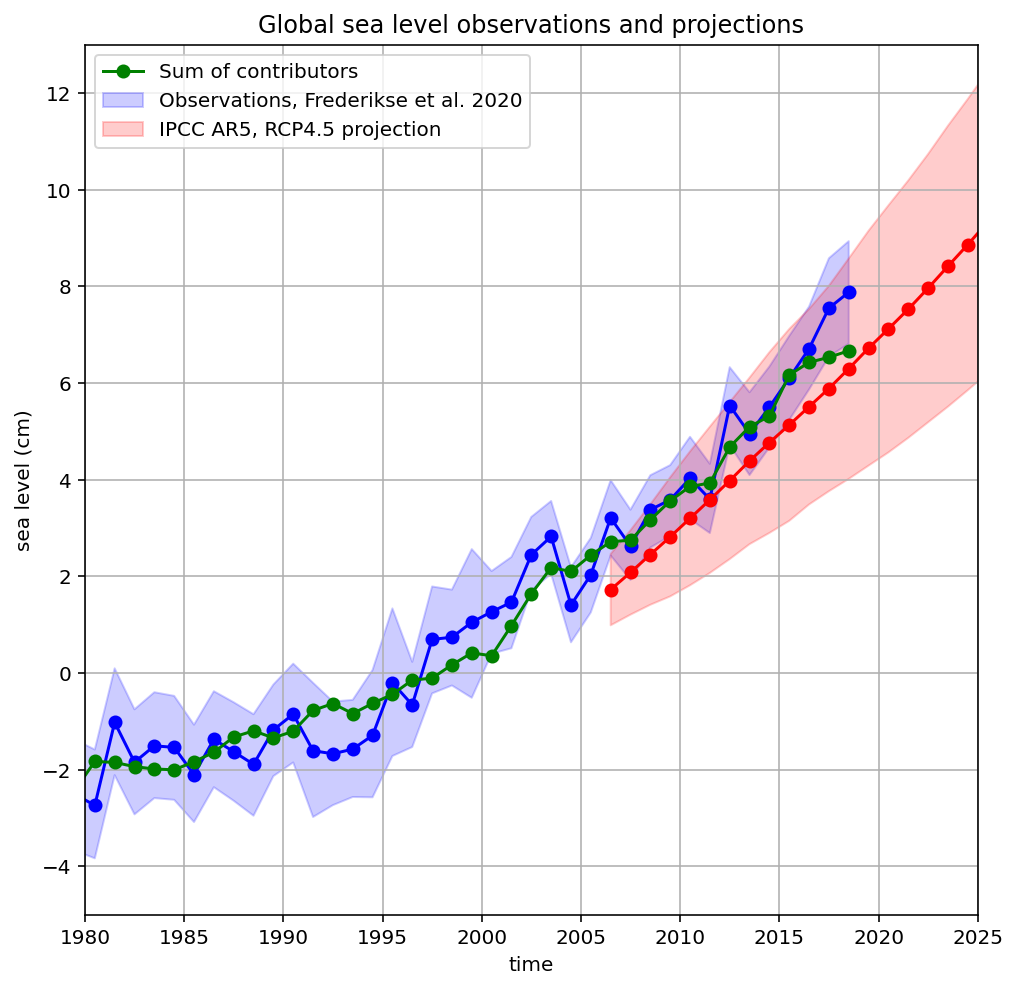

In [83]:
fig, ax = plt.subplots(figsize=(8,8))

ax.fill_between(cts_df.index, cts_df['Observed GMSL [lower]'], 
                cts_df['Observed GMSL [upper]'], color='blue',alpha=0.2,
               label='Observations, Frederikse et al. 2020')
ax.plot(cts_df['Observed GMSL [mean]'], 'ob-')

ax.plot(cts_df['Sum of contributors [mean]'], 'og-', label='Sum of contributors')

ax.fill_between(cts_df.index, cts_df['rcp45_sumlower'], 
                cts_df['rcp45_sumupper'], color='red',alpha=0.2,
               label='IPCC AR5, RCP4.5 projection')
ax.plot(cts_df['rcp45_summid'], 'or-')

#ax.set_aspect(1)
ax.set_xlim([1980,2025])
ax.set_ylim([-5,13])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Global sea level observations and projections')
ax.grid(True)
plt.legend(loc='upper left')

#plt.savefig('../figures/GlobalComparisonProjObs_rcp45.pdf', dpi=150)

### Make the comparison process by process

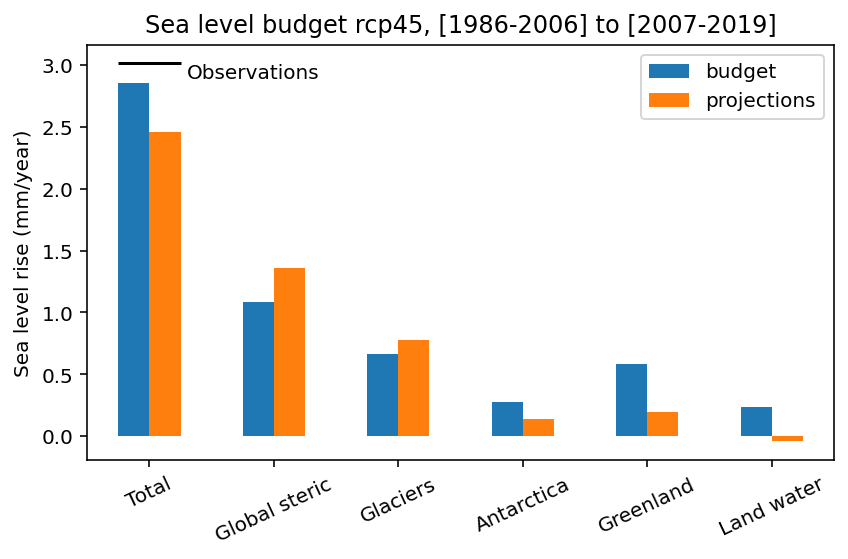

In [87]:
sp = 2007
ep = 2019
ref_s = 1986
ref_e = 2006
tot_years = (sp+ep)/2 - (ref_e+ref_s)/2

# !!! Only works for the mean contribution, for the uncertainty it doesn't
# Multiply by 10 to get mm/yr instead of cm/yr
proj_diff = ar5_proj_df.loc[sp:ep].mean()/tot_years*10
budget_diff = (fts.loc[sp:ep].mean() - fts.loc[ref_s:ref_e].mean())/tot_years

# Build a new dataframe for comparison purposes:
index = ['Total', 'Global steric', 'Glaciers', 'Antarctica', 
         'Greenland', 'Land water']

obs_budget = [budget_diff['Sum of contributors [mean]'], budget_diff['Steric [mean]'],
             budget_diff['Glaciers [mean]'], budget_diff['Antarctic Ice Sheet [mean]'],
             budget_diff['Greenland Ice Sheet [mean]'], budget_diff['Terrestrial Water Storage [mean]']]

proj_diff_ant = proj_diff[f'{SCE}_antdynmid'] + proj_diff[f'{SCE}_antsmbmid']
proj_diff_gre = proj_diff[f'{SCE}_greendynmid'] + proj_diff[f'{SCE}_greensmbmid']
ar5_proj = [proj_diff[f'{SCE}_summid'], proj_diff[f'{SCE}_expansionmid'], 
            proj_diff[f'{SCE}_glaciermid'], proj_diff_ant, proj_diff_gre, 
            proj_diff[f'{SCE}_landwatermid']]

comp_df = pd.DataFrame({'budget': obs_budget,
                        'projections': ar5_proj}, index=index)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
comp_df.plot.bar(ax=ax, rot=25)

ax.hlines(y=budget_diff['Observed GMSL [mean]'], xmin=-0.25, xmax=0.25, color='black')
ax.text(0.3, budget_diff['Observed GMSL [mean]'], 'Observations', va='top', ha='left') #transform=ax.transAxes
ax.set_ylabel('Sea level rise (mm/year)')
ax.set_title(f'Sea level budget {SCE}, ['+str(ref_s)+'-'+str(ref_e)+']'+' to ['+str(sp)+'-'+str(ep)+']' )
plt.tight_layout()

plt.savefig(f'../figures/GlobalComparisonBudgetProj_{SCE}.pdf', dpi=150)